<a href="https://colab.research.google.com/github/PeterLOVANAS/Titanic-machine-learning-project/blob/main/Copy_of_Titanic_firstML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [243]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [244]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import math
import pandasql as ps
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import BatchNormalization


In [245]:
data = pd.read_csv('https://raw.githubusercontent.com/PeterLOVANAS/Titanic-machine-learning-project/main/datasets/train.csv')
ps.sqldf("""SELECT 
    *
    FROM data
""")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,None,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,None,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **Data Preprocessing**

## Training datasets (Without normalization)

In [246]:
print(data["Embarked"].drop_duplicates())
print(data["Cabin"].drop_duplicates())

0       S
1       C
5       Q
61    NaN
Name: Embarked, dtype: object
0       NaN
1       C85
3      C123
6       E46
10       G6
       ... 
857     E17
867     A24
879     C50
887     B42
889    C148
Name: Cabin, Length: 148, dtype: object


In [247]:
df = data.copy()
df["Sex"] =  df["Sex"].apply(lambda x : 1 if x == "male" else 0)
df["Sex"]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [248]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [249]:
df["Age"] = df["Age"].fillna(np.mean(df["Age"]))
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [250]:
df["Embarked"] = data.copy()["Embarked"]
df["Embarked"].fillna("S", inplace = True)

def replace_embarked(x):
  if x == "S":
    return 0
  elif x == "C":
    return 1
  elif x == "Q":
    return 2
df["Embarked"]  = df["Embarked"].apply(replace_embarked)
print(df["Embarked"].head())

0    0
1    1
2    0
3    0
4    0
Name: Embarked, dtype: int64


In [251]:
df["Cabin"] = data.copy()["Cabin"]
df["Cabin"].fillna("G6",  inplace= True)

set_val = set()
for i in df.index:
  set_val.add(df["Cabin"][i][0])
set_val = sorted(set_val)
ind_lst = list(range(len(set_val)))
dic_cabin = {set_val[i]: ind_lst[i] for i in range(len(set_val))}
print(dic_cabin)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7}


In [252]:
def replace_cabin(x):
  return dic_cabin[x[0]]
df["Cabin"] = df["Cabin"].apply(replace_cabin)
print(df["Cabin"].head())

0    6
1    2
2    6
3    2
4    6
Name: Cabin, dtype: int64


In [253]:
predictors = df.drop(["Survived", "Name","Ticket","PassengerId"] , axis = 1).values
target = to_categorical(df["Survived"])

n_col = predictors.shape[1]
print(f"target = \n{target}\n")
print(f"predictive features = \n{predictors}")

target = 
[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]

predictive features = 
[[ 3.          1.         22.         ...  7.25        6.
   0.        ]
 [ 1.          0.         38.         ... 71.2833      2.
   1.        ]
 [ 3.          0.         26.         ...  7.925       6.
   0.        ]
 ...
 [ 3.          0.         29.69911765 ... 23.45        6.
   0.        ]
 [ 1.          1.         26.         ... 30.          2.
   1.        ]
 [ 3.          1.         32.         ...  7.75        6.
   2.        ]]


In [254]:
data.info() # the process is finally over.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [255]:
# Seperate training data into train and validation
ratio = math.trunc(len(predictors)*0.8)
predictors_train = predictors[:ratio]
predictors_valid = predictors[ratio:]
target_train = target[:ratio]
target_valid = target[ratio:]


In [256]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Training datasets (with normalization)

In [257]:
def normalize(df):
  norm_df = df.copy()
  for name in df.columns:
    max_val = df[name].max()
    min_val = df[name].min()
    norm_df[name] = (norm_df[name] - min_val) / (max_val - min_val)
  return norm_df

In [258]:
predictors_norm = normalize(df.drop(["Survived", "Name","Ticket", "PassengerId"] , axis = 1)).values
predictors_norm_train = predictors_norm[:ratio]
predictors_norm_valid = predictors_norm[ratio:]
len(predictors_norm_train)

712

## Testing dataset

In [259]:
data_1 = pd.read_csv("https://raw.githubusercontent.com/PeterLOVANAS/Titanic-machine-learning-project/main/datasets/test.csv")

In [260]:
df1 = data_1.copy()
df1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [261]:
df1["Age"] = df1["Age"].fillna(np.mean(df1["Age"]))
df1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [262]:
df1["Cabin"].fillna("G6",  inplace= True)
df1["Cabin"] = df1["Cabin"].apply(replace_cabin)
df1.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [263]:
df1["Fare"] = df1["Fare"].fillna(np.mean(df1["Fare"]))
df1.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [264]:
df1["Embarked"]  = df1["Embarked"].apply(replace_embarked)
df1["Embarked"]

0      2
1      0
2      2
3      0
4      0
      ..
413    0
414    1
415    0
416    0
417    1
Name: Embarked, Length: 418, dtype: int64

In [265]:
df1["Sex"] =  df1["Sex"].apply(lambda x : 1 if x == "male" else 0)
df1["Sex"]

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int64

In [266]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    int64  
 10  Embarked     418 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 36.0+ KB


In [267]:
predictors_test = df1.drop(["Name","Ticket", "PassengerId"] , axis = 1).values # Can use df.to_numpy()
predictors_test

array([[ 3.        ,  1.        , 34.5       , ...,  7.8292    ,
         6.        ,  2.        ],
       [ 3.        ,  0.        , 47.        , ...,  7.        ,
         6.        ,  0.        ],
       [ 2.        ,  1.        , 62.        , ...,  9.6875    ,
         6.        ,  2.        ],
       ...,
       [ 3.        ,  1.        , 38.5       , ...,  7.25      ,
         6.        ,  0.        ],
       [ 3.        ,  1.        , 30.27259036, ...,  8.05      ,
         6.        ,  0.        ],
       [ 3.        ,  1.        , 30.27259036, ..., 22.3583    ,
         6.        ,  1.        ]])

In [268]:
data_test = pd.read_csv("https://raw.githubusercontent.com/PeterLOVANAS/Titanic-machine-learning-project/main/datasets/gender_submission.csv")
target_test = to_categorical(data_test["Survived"])


# **Utility**

In [269]:
def plot_loss(hist: dict , style = "ggplot"):
  plt.style.use(style)
  plt.plot(hist['loss'], label = 'loss')
  plt.plot(hist["val_loss"]  ,label = "val loss")
  plt.title("Loss vs Val loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

def plot_accu(hist: dict , style = "ggplot"):
  plt.style.use(style)
  plt.plot(hist['accuracy'], label = 'accuracy')
  plt.plot(hist["val_accuracy"]  ,label = "val accuracy")
  plt.title("Accuracy vs Val accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(loc = "lower right")
  plt.show()

# **Model V1**



In [270]:
modelV1 = Sequential()
modelV1.add(Dense(32, activation = "relu" , input_shape = (n_col ,)))
modelV1.add(Dense(32 , activation = "relu"))
modelV1.add(Dense(2 , activation = "softmax"))

## Attempt 1 

### Training (Attempt 1)

Training without validation data

In [271]:
modelV1.compile(optimizer = "adam" , loss = "categorical_crossentropy" , metrics = ["accuracy"])
#model.fit(tf.convert_to_tensor(predictors, dtype=tf.int64)  , tf.convert_to_tensor(target, dtype=tf.int64) )
histV1_1 = modelV1.fit(predictors , target, epochs = 200)

Epoch 1/200
28/28 [==============================] - 1s 1ms/step - loss: 0.7186 - accuracy: 0.6229
Epoch 2/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6500 - accuracy: 0.6712
Epoch 3/200
28/28 [==============================] - 0s 1ms/step - loss: 0.5988 - accuracy: 0.7059
Epoch 4/200
28/28 [==============================] - 0s 2ms/step - loss: 0.5924 - accuracy: 0.7015
Epoch 5/200
28/28 [==============================] - 0s 2ms/step - loss: 0.5774 - accuracy: 0.6947
Epoch 6/200
28/28 [==============================] - 0s 2ms/step - loss: 0.5735 - accuracy: 0.7093
Epoch 7/200
28/28 [==============================] - 0s 1ms/step - loss: 0.5513 - accuracy: 0.7104
Epoch 8/200
28/28 [==============================] - 0s 2ms/step - loss: 0.5500 - accuracy: 0.7273
Epoch 9/200
28/28 [==============================] - 0s 2ms/step - loss: 0.5376 - accuracy: 0.7295
Epoch 10/200
28/28 [==============================] - 0s 2ms/step - loss: 0.5301 - accuracy: 0.7542
Epoch 11/

### Test (Attempt 1)

In [272]:
test_lost , test_accu = modelV1.evaluate(predictors_test , target_test)

14/14 [==============================] - 0s 1ms/step - loss: 0.3588 - accuracy: 0.8828


## Attempt 2

### Training (Attempt 2)

Training with Validation data

In [273]:
modelV1.compile(optimizer = "adam" , loss = "categorical_crossentropy" , metrics = ["accuracy"])
histV1_2 = modelV1.fit(predictors_train , target_train  , validation_data = (predictors_valid, target_valid) , epochs = 200)

Epoch 1/200
23/23 [==============================] - 1s 14ms/step - loss: 0.4258 - accuracy: 0.8216 - val_loss: 0.2910 - val_accuracy: 0.8771
Epoch 2/200
23/23 [==============================] - 0s 2ms/step - loss: 0.4120 - accuracy: 0.8258 - val_loss: 0.3273 - val_accuracy: 0.8715
Epoch 3/200
23/23 [==============================] - 0s 3ms/step - loss: 0.4158 - accuracy: 0.8258 - val_loss: 0.3752 - val_accuracy: 0.8659
Epoch 4/200
23/23 [==============================] - 0s 3ms/step - loss: 0.4278 - accuracy: 0.8146 - val_loss: 0.2934 - val_accuracy: 0.8771
Epoch 5/200
23/23 [==============================] - 0s 3ms/step - loss: 0.4262 - accuracy: 0.8216 - val_loss: 0.3069 - val_accuracy: 0.8771
Epoch 6/200
23/23 [==============================] - 0s 3ms/step - loss: 0.4337 - accuracy: 0.7992 - val_loss: 0.3408 - val_accuracy: 0.8659
Epoch 7/200
23/23 [==============================] - 0s 3ms/step - loss: 0.4163 - accuracy: 0.8062 - val_loss: 0.2957 - val_accuracy: 0.8827
Epoch 8/200


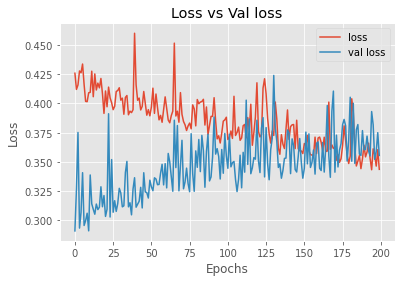

In [274]:
hist_dict_model_1 = histV1_2.history
plot_loss(hist_dict_model_1)

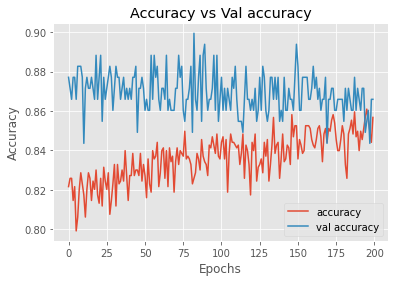

In [275]:
plot_accu(hist_dict_model_1)

### Test (Attempt 2)

In [276]:
test_loss , test_acc = modelV1.evaluate(predictors_test ,target_test)


14/14 [==============================] - 0s 1ms/step - loss: 0.4274 - accuracy: 0.8445


## Attempt 3

### Training (Attempt 3)

Using normalized datasets

In [277]:
print(len(predictors_norm_valid) + len(predictors_norm_train))

891


In [278]:
print(len(predictors_norm_train))

712


In [279]:
modelV1.compile(optimizer = "adam" , loss = "categorical_crossentropy" , metrics = ["accuracy"])
histV1_3 = modelV1.fit(predictors_norm_train , target_train  , validation_data = (predictors_norm_valid, target_valid) , epochs = 200)

Epoch 1/200
23/23 [==============================] - 1s 9ms/step - loss: 1.9186 - accuracy: 0.3848 - val_loss: 1.3671 - val_accuracy: 0.3575
Epoch 2/200
23/23 [==============================] - 0s 2ms/step - loss: 0.9411 - accuracy: 0.3989 - val_loss: 0.6005 - val_accuracy: 0.7821
Epoch 3/200
23/23 [==============================] - 0s 2ms/step - loss: 0.5223 - accuracy: 0.7725 - val_loss: 0.4294 - val_accuracy: 0.8380
Epoch 4/200
23/23 [==============================] - 0s 3ms/step - loss: 0.4610 - accuracy: 0.7949 - val_loss: 0.4154 - val_accuracy: 0.8268
Epoch 5/200
23/23 [==============================] - 0s 3ms/step - loss: 0.4527 - accuracy: 0.7963 - val_loss: 0.4100 - val_accuracy: 0.8324
Epoch 6/200
23/23 [==============================] - 0s 4ms/step - loss: 0.4500 - accuracy: 0.7978 - val_loss: 0.4049 - val_accuracy: 0.8324
Epoch 7/200
23/23 [==============================] - 0s 3ms/step - loss: 0.4459 - accuracy: 0.7992 - val_loss: 0.4025 - val_accuracy: 0.8380
Epoch 8/200
2

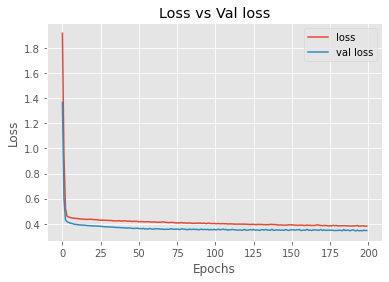

In [280]:
hist_dict_model_3 = histV1_3.history
plot_loss(hist_dict_model_3)

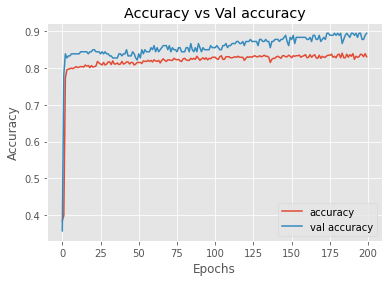

In [281]:
plot_accu(hist_dict_model_3)

### Testing (Attempt 3)

In [282]:
test_loss , test_acc = modelV1.evaluate(predictors_test , target_test)

14/14 [==============================] - 0s 1ms/step - loss: 73.8384 - accuracy: 0.3756


# **Model V2**

In [283]:
modelV2 = Sequential()
modelV2.add(Dense(32, activation = "relu" , input_shape = (n_col ,)))
modelV2.add(tf.keras.layers.Dropout(0.5))

modelV2.add(Dense(32 , activation = "relu"))
modelV2.add(tf.keras.layers.Dropout(0.5))

modelV2.add(Dense(2 , activation = "softmax"))


## Attempt 1 


### Training (Attempt 1)

Training with pure data

In [284]:
modelV2.compile(optimizer = "adam" , loss = "categorical_crossentropy" , metrics = ["accuracy"])
histV2_1 = modelV2.fit(predictors_train , target_train  , validation_data = (predictors_valid, target_valid) , epochs = 200 , verbose = 1 )

Epoch 1/200
23/23 [==============================] - 1s 8ms/step - loss: 9.2578 - accuracy: 0.4354 - val_loss: 1.8029 - val_accuracy: 0.5922
Epoch 2/200
23/23 [==============================] - 0s 3ms/step - loss: 5.2034 - accuracy: 0.5169 - val_loss: 0.9924 - val_accuracy: 0.6983
Epoch 3/200
23/23 [==============================] - 0s 3ms/step - loss: 5.2617 - accuracy: 0.5337 - val_loss: 0.9417 - val_accuracy: 0.6983
Epoch 4/200
23/23 [==============================] - 0s 3ms/step - loss: 4.2039 - accuracy: 0.5478 - val_loss: 0.8854 - val_accuracy: 0.7039
Epoch 5/200
23/23 [==============================] - 0s 2ms/step - loss: 2.9183 - accuracy: 0.5660 - val_loss: 0.7906 - val_accuracy: 0.7095
Epoch 6/200
23/23 [==============================] - 0s 3ms/step - loss: 3.2010 - accuracy: 0.5492 - val_loss: 0.6783 - val_accuracy: 0.6927
Epoch 7/200
23/23 [==============================] - 0s 2ms/step - loss: 2.4469 - accuracy: 0.5899 - val_loss: 0.6107 - val_accuracy: 0.6983
Epoch 8/200
2

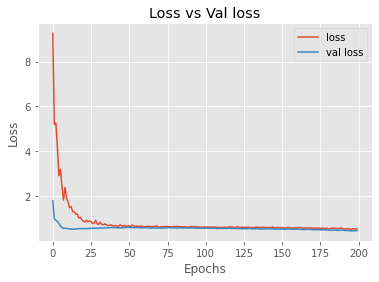

In [285]:
dict_histV2_1 = histV2_1.history
plot_loss(dict_histV2_1)

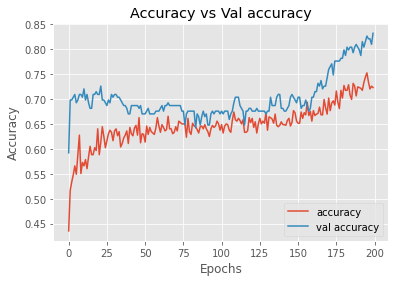

In [286]:
plot_accu(dict_histV2_1)

### Testing (Attempt 1)

In [287]:
test_loss , test_acc = modelV2.evaluate(predictors_test ,target_test)

14/14 [==============================] - 0s 1ms/step - loss: 0.4436 - accuracy: 0.8900


# Model V3

In [288]:
modelV3 = Sequential()
modelV3.add(Dense(32, activation = "relu" , input_shape = (n_col ,)))
modelV3.add(BatchNormalization())
modelV3.add(tf.keras.layers.Dropout(0.5))

modelV3.add(Dense(32 , activation = "relu"))
modelV3.add(BatchNormalization())
modelV3.add(tf.keras.layers.Dropout(0.5))

modelV3.add(Dense(2 , activation = "softmax"))

## Attempt 1 

### Training (Attempt 1)

In [289]:
modelV3.compile(optimizer = "adam" , loss = "categorical_crossentropy" , metrics = ["accuracy"])
histV3_1 = modelV3.fit(predictors_train , target_train  , validation_data = (predictors_valid, target_valid) , epochs = 200 , verbose = 1 )

Epoch 1/200
23/23 [==============================] - 1s 13ms/step - loss: 1.1443 - accuracy: 0.5660 - val_loss: 3.1233 - val_accuracy: 0.3575
Epoch 2/200
23/23 [==============================] - 0s 4ms/step - loss: 1.0237 - accuracy: 0.5969 - val_loss: 1.3463 - val_accuracy: 0.3520
Epoch 3/200
23/23 [==============================] - 0s 5ms/step - loss: 0.9546 - accuracy: 0.5829 - val_loss: 0.8157 - val_accuracy: 0.4693
Epoch 4/200
23/23 [==============================] - 0s 3ms/step - loss: 0.8416 - accuracy: 0.6152 - val_loss: 0.6202 - val_accuracy: 0.6760
Epoch 5/200
23/23 [==============================] - 0s 3ms/step - loss: 0.8684 - accuracy: 0.5885 - val_loss: 0.5731 - val_accuracy: 0.7095
Epoch 6/200
23/23 [==============================] - 0s 5ms/step - loss: 0.8404 - accuracy: 0.5772 - val_loss: 0.5511 - val_accuracy: 0.7263
Epoch 7/200
23/23 [==============================] - 0s 3ms/step - loss: 0.7877 - accuracy: 0.5997 - val_loss: 0.5417 - val_accuracy: 0.7374
Epoch 8/200


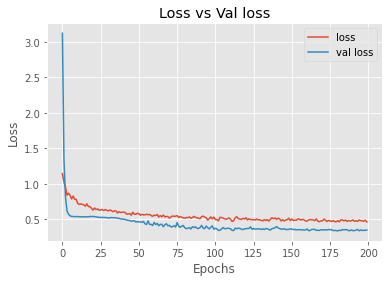

In [290]:
dict_histV3_1 = histV3_1.history
plot_loss(dict_histV3_1)

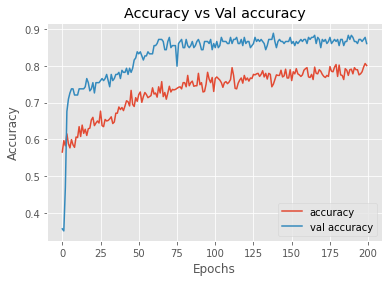

In [291]:
plot_accu(dict_histV3_1)

### Testing (Attempt 1)

In [292]:
test_loss , test_acc = modelV3.evaluate(predictors_test ,target_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.3088 - accuracy: 0.9019


# Model V4 

In [293]:
modelV4 = Sequential()
modelV4.add(Dense(32, activation = "relu" , input_shape = (n_col ,), kernel_regularizer='l1'))
modelV4.add(BatchNormalization())
modelV4.add(tf.keras.layers.Dropout(0.5))

modelV4.add(Dense(32 , activation = "relu"))
modelV4.add(BatchNormalization())
modelV4.add(tf.keras.layers.Dropout(0.5))

modelV4.add(Dense(2 , activation = "softmax"))

## Training 

In [294]:
modelV4.compile(optimizer = "adam" , loss = "categorical_crossentropy" , metrics = ["accuracy"])
histV4_1 = modelV4.fit(predictors_train , target_train  , validation_data = (predictors_valid, target_valid) , epochs = 200 , verbose = 1 )

Epoch 1/200
23/23 [==============================] - 1s 11ms/step - loss: 1.7550 - accuracy: 0.4438 - val_loss: 1.3424 - val_accuracy: 0.6425
Epoch 2/200
23/23 [==============================] - 0s 4ms/step - loss: 1.4913 - accuracy: 0.5323 - val_loss: 0.9997 - val_accuracy: 0.7039
Epoch 3/200
23/23 [==============================] - 0s 3ms/step - loss: 1.3951 - accuracy: 0.5337 - val_loss: 0.9380 - val_accuracy: 0.7151
Epoch 4/200
23/23 [==============================] - 0s 3ms/step - loss: 1.2820 - accuracy: 0.5758 - val_loss: 0.9055 - val_accuracy: 0.7151
Epoch 5/200
23/23 [==============================] - 0s 4ms/step - loss: 1.2156 - accuracy: 0.5955 - val_loss: 0.8812 - val_accuracy: 0.7263
Epoch 6/200
23/23 [==============================] - 0s 3ms/step - loss: 1.1402 - accuracy: 0.6208 - val_loss: 0.8607 - val_accuracy: 0.7151
Epoch 7/200
23/23 [==============================] - 0s 4ms/step - loss: 1.0996 - accuracy: 0.6180 - val_loss: 0.8355 - val_accuracy: 0.7151
Epoch 8/200


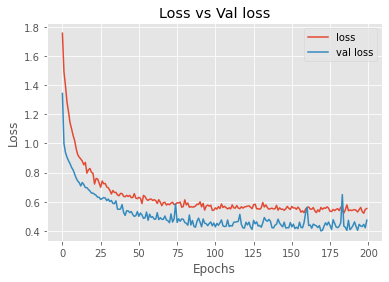

In [295]:
dict_histV4_1 = histV4_1.history
plot_loss(dict_histV4_1)

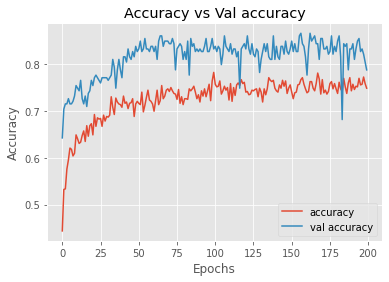

In [296]:
plot_accu(dict_histV4_1)

## Testing

In [297]:
test_loss , test_acc = modelV4.evaluate(predictors_test ,target_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.4189 - accuracy: 0.8325


# Model V5 

In [298]:
modelV5 = Sequential()
modelV5.add(Dense(16, activation = "relu" , input_shape = (n_col ,)))
modelV5.add(BatchNormalization())
modelV5.add(tf.keras.layers.Dropout(0.5))

modelV5.add(Dense(16 , activation = "relu"))
modelV5.add(BatchNormalization())
modelV5.add(tf.keras.layers.Dropout(0.5))

modelV5.add(Dense(16 , activation = "relu"))
modelV5.add(BatchNormalization())
modelV5.add(tf.keras.layers.Dropout(0.5))



modelV5.add(Dense(2 , activation = "softmax"))

## Attempt 1

### Training (Attempt 1)

In [299]:
modelV5.compile(optimizer = "adam" , loss = "categorical_crossentropy" , metrics = ["accuracy"])
histV5_1 = modelV5.fit(predictors_train , target_train  , validation_data = (predictors_valid, target_valid) , epochs = 200 , verbose = 1 )

Epoch 1/200
23/23 [==============================] - 1s 12ms/step - loss: 1.1603 - accuracy: 0.4817 - val_loss: 0.7308 - val_accuracy: 0.6648
Epoch 2/200
23/23 [==============================] - 0s 4ms/step - loss: 1.1044 - accuracy: 0.5042 - val_loss: 0.6476 - val_accuracy: 0.6480
Epoch 3/200
23/23 [==============================] - 0s 3ms/step - loss: 0.9900 - accuracy: 0.5463 - val_loss: 0.6197 - val_accuracy: 0.6313
Epoch 4/200
23/23 [==============================] - 0s 3ms/step - loss: 0.8869 - accuracy: 0.5758 - val_loss: 0.6154 - val_accuracy: 0.6983
Epoch 5/200
23/23 [==============================] - 0s 3ms/step - loss: 0.8999 - accuracy: 0.5435 - val_loss: 0.6160 - val_accuracy: 0.7095
Epoch 6/200
23/23 [==============================] - 0s 4ms/step - loss: 0.9302 - accuracy: 0.5772 - val_loss: 0.6039 - val_accuracy: 0.7095
Epoch 7/200
23/23 [==============================] - 0s 4ms/step - loss: 0.8091 - accuracy: 0.5871 - val_loss: 0.5985 - val_accuracy: 0.7095
Epoch 8/200


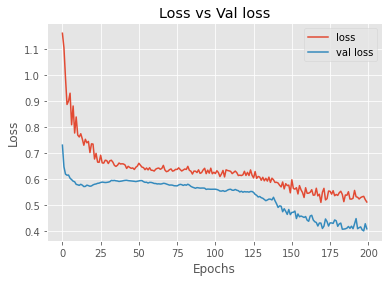

In [300]:
dict_histV5_1 = histV5_1.history
plot_loss(dict_histV5_1)

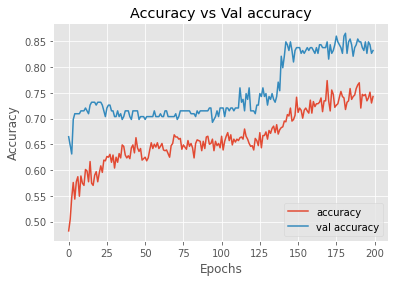

In [301]:
plot_accu(dict_histV5_1)

### Testing (Attempt 1)

In [302]:
test_loss , test_acc = modelV5.evaluate(predictors_test ,target_test)

14/14 [==============================] - 0s 1ms/step - loss: 0.3667 - accuracy: 0.8947


## Attempt 2 

### Training (Attempt 2)

In [303]:
learning_rate = 0.001
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
modelV5.compile(optimizer = opt, loss = "categorical_crossentropy" , metrics = ["accuracy"])
histV5_2 = modelV5.fit(predictors_train , target_train  , validation_data = (predictors_valid, target_valid) , epochs = 200 , verbose = 1 )


Epoch 1/200
23/23 [==============================] - 1s 11ms/step - loss: 0.5238 - accuracy: 0.7346 - val_loss: 0.3871 - val_accuracy: 0.8436
Epoch 2/200
23/23 [==============================] - 0s 3ms/step - loss: 0.5184 - accuracy: 0.7584 - val_loss: 0.3926 - val_accuracy: 0.8492
Epoch 3/200
23/23 [==============================] - 0s 3ms/step - loss: 0.5034 - accuracy: 0.7542 - val_loss: 0.4036 - val_accuracy: 0.8324
Epoch 4/200
23/23 [==============================] - 0s 3ms/step - loss: 0.5227 - accuracy: 0.7556 - val_loss: 0.3850 - val_accuracy: 0.8547
Epoch 5/200
23/23 [==============================] - 0s 3ms/step - loss: 0.5124 - accuracy: 0.7725 - val_loss: 0.3831 - val_accuracy: 0.8436
Epoch 6/200
23/23 [==============================] - 0s 3ms/step - loss: 0.5258 - accuracy: 0.7458 - val_loss: 0.4032 - val_accuracy: 0.8436
Epoch 7/200
23/23 [==============================] - 0s 4ms/step - loss: 0.5046 - accuracy: 0.7654 - val_loss: 0.3886 - val_accuracy: 0.8268
Epoch 8/200


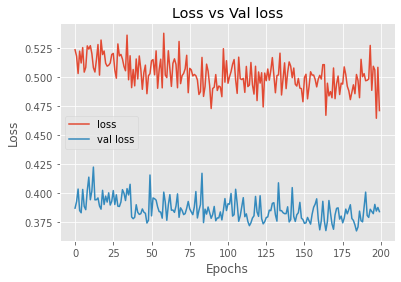

In [304]:
dict_histV5_2 = histV5_2.history
plot_loss(dict_histV5_2)

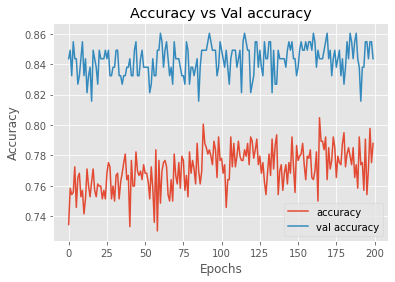

In [305]:
plot_accu(dict_histV5_2)

###Testing (Attempt 2)

In [306]:
test_loss , test_acc = modelV5.evaluate(predictors_test , target_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.3222 - accuracy: 0.9187


In [307]:
result = modelV5.predict(predictors_test)
print(type(result))
def predict_state(arr):
  lst = []
  for p in arr:
    if p[0] > 0.5:
      lst.append(0) # Died
    elif p[1] > 0.5:
      lst.append(1) # Survived
  return lst

14/14 [==============================] - 0s 1ms/step
<class 'numpy.ndarray'>


In [308]:
output = pd.DataFrame({"PassengerID" : df1["PassengerId"], "Survived (Prediction)" : predict_state(result), "Survived (Real)": data_test["Survived"].values} )
output # Final result

,PassengerID,Survived (Prediction),Survived (Real)
0,892,0,0
1,893,0,1
2,894,0,0
3,895,0,0
4,896,1,1
...,...,...,...
413,1305,0,0
414,1306,1,1
415,1307,0,0
416,1308,0,0


In [309]:
modelV5.save("/content/drive/MyDrive/Colab_models/modelV5_2_1D.h5") #V5 ,1st attempt, 1st download
output.to_csv("/content/drive/MyDrive/Data/output_V5_2_1D.csv" , index = False, encoding= "utf-8")

In [310]:
len(predictors_test)

418

In [311]:
target_test # Column 1 : Not Survived , Column 2 : Survived
# Note :  1 means True in each surviving state (Survive or die) 
#         2 means False in each surviving state (Survive or die) 

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

## Attempt 3

### Training (Attempt 3)

In [312]:
learning_rate = 0.001
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
modelV5.compile(optimizer = opt, loss = "categorical_crossentropy" , metrics = ["accuracy"])
histV5_3 = modelV5.fit(predictors_norm_train , target_train  , validation_data = (predictors_norm_valid, target_valid) , epochs = 200 , verbose = 1 )


Epoch 1/200
23/23 [==============================] - 1s 16ms/step - loss: 0.5217 - accuracy: 0.7809 - val_loss: 0.7462 - val_accuracy: 0.3687
Epoch 2/200
23/23 [==============================] - 0s 5ms/step - loss: 0.5124 - accuracy: 0.7823 - val_loss: 0.6030 - val_accuracy: 0.6648
Epoch 3/200
23/23 [==============================] - 0s 4ms/step - loss: 0.5289 - accuracy: 0.7921 - val_loss: 0.5248 - val_accuracy: 0.7709
Epoch 4/200
23/23 [==============================] - 0s 4ms/step - loss: 0.5260 - accuracy: 0.7711 - val_loss: 0.4818 - val_accuracy: 0.8045
Epoch 5/200
23/23 [==============================] - 0s 5ms/step - loss: 0.5104 - accuracy: 0.7795 - val_loss: 0.4604 - val_accuracy: 0.8045
Epoch 6/200
23/23 [==============================] - 0s 5ms/step - loss: 0.5044 - accuracy: 0.7921 - val_loss: 0.4463 - val_accuracy: 0.8045
Epoch 7/200
23/23 [==============================] - 0s 6ms/step - loss: 0.5133 - accuracy: 0.7865 - val_loss: 0.4409 - val_accuracy: 0.8045
Epoch 8/200


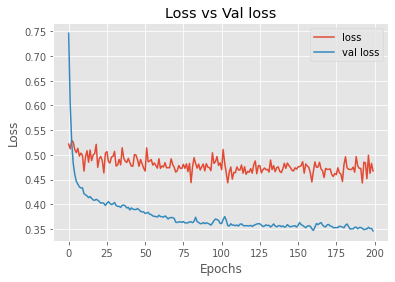

In [313]:
dict_histV5_3 = histV5_3.history
plot_loss(dict_histV5_3)

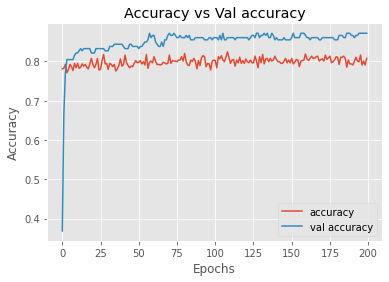

In [314]:
plot_accu(dict_histV5_3)

### Testing (Attempt 3)

In [315]:
test_loss , test_acc = modelV5.evaluate(predictors_test , target_test)

14/14 [==============================] - 0s 1ms/step - loss: 1.1883 - accuracy: 0.6579
